<h1 style="color: white; background: seablue;">
<pre>
Problem:
    -Attempt to determine the best video genre from comments and their video ID.
    -Give further proposals on the best type of content to give to users considering features such as their age groups.
</pre>
</h1>

In [5]:
import numpy as np;
import pandas as pd;
import re; # Regular Expression Python
# from textblob import TextBlob; # Text analysis

import seaborn as sns;
import matplotlib.pyplot as plt;

<h1 style="background-color: red; padding: 5px 8px;">Importing the DataSet</h1>

In [18]:
comments = pd.read_csv("./UScomments.csv", error_bad_lines=False, warn_bad_lines=False, low_memory=False);
comments.head(12)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


<h1 style="background-color: red; padding: 5px 8px;">Mild Cleaning</h1>

In [13]:
Nans = comments.loc[np.array(comments.isna()).reshape(-1, 4)]

In [14]:
comments.dropna(inplace=True);

<h1 style="background-color: red; padding: 5px 8px;">Descriptive DA(What happened ?)</h1>

## 2) Plot a bar plot of the 700 most positive videos.

In [15]:
# Calculate the polarity for each comment
polarity = [];
for i in comments["comment_text"]:
    polarity.append(TextBlob(i).sentiment.polarity);

NameError: name 'TextBlob' is not defined

In [9]:
# Create a new feature called polarity
comments["polarity"] = polarity;

In [10]:
# Determine relationship between polarity and likes
# inorder to check for the real positve feature

In [11]:
c = comments.loc[:, ['likes', 'replies']]
c.dtypes

likes      object
replies    object
dtype: object

In [12]:
# Not working becaue of ignore errors
c.astype(np.dtype("float64"), errors="ignore").dtypes

likes      object
replies    object
dtype: object

In [13]:
# Sort the videos by the polarity values in form the best reviews to the least
comments.sort_values(by="polarity", ascending=False, inplace=True);
# Reset the index values of the videos after sorting
comments.reset_index(inplace=True);

In [14]:
comments.drop(["index"], axis=1, inplace=True);
comments

,video_id,comment_text,likes,replies,polarity
0,R1ZXOOLMJ8s,The best trailer of this year,0,0,1.0
1,Ca3rEOlAfpc,Make mooncakes :D,0,0,1.0
2,UdHopftQD3A,Lindo ♥,0,0,1.0
3,Ca3rEOlAfpc,Level up custard!!! :D :D,1,0,1.0
4,PgeJ0XYuI2E,"Superb breakdown, informative and balanced.",0,0,1.0
...,...,...,...,...,...
691370,W-8nCyXm03E,Terrible video!!,0,0,-1.0
691371,Ri4xPHGS5f8,DID O.J. SIMPSON shoot up the VEGAS STRIP? 'FA...,0,0,-1.0
691372,6l5P7jHUcjI,She’s a fucking boss!! Ate 20 patties like a c...,0,0,-1.0
691373,e4HRUcyMvZY,what a boring sport,8,36,-1.0


In [17]:
# Determine the averagepolarty of the videos
group = comments.groupby(by=["video_id"]).mean()
group

,polarity
video_id,
--JinobXWPk,0.046776
-1fzGnFwz9M,0.137792
-3AGlBYyLjo,-0.306250
-5sCWsLlTCI,0.096262
-6Zc8Co2H3w,0.230334
...,...
zqE-ultsWt0,0.093695
zrOHeEA14kQ,0.035670
zuKX0fPlo2Q,0.592188


In [18]:
# Sort by average best polarity
group.sort_values(by="polarity", ascending=False, inplace=True)

In [19]:
# Reset the index of the videos
group.reset_index(inplace=True);

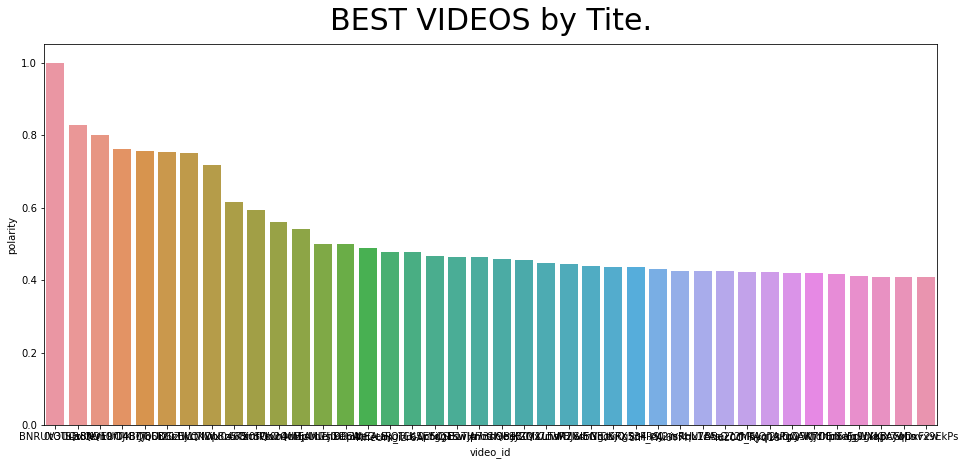

In [34]:
plt.figure(figsize=(16, 7));
sns.barplot(x=group["video_id"].head(40), y=group['polarity'].head(40), ci=5, capsize=0.2);
#plt.axis("off");
plt.title("BEST VIDEOS by ID.", pad=14.4, fontdict={'fontsize': 30});

In [21]:
# Try to understand the theme/Genre that caused and provided so much attention

# FROM ABOVE ANALYSIS, CREATE A MODEL THAT WOULD PREDICT THE GENRE FOR EACH BLOC OF BEST COMMENTS

In [20]:
#Soultion is to build a text classifier
# Now test text classifiation using:
    # - Default feature extractor from TextBlob.classify()
    # - Your own Extractor(Dialect names classification)
    # - WordClooud Analysis Data

In [118]:
from sklearn.model_selection import StratifiedKFold

In [130]:
dataset = [('Lionel Messi is the best player ', 'SPORTS'),
           ('Cristiano ronaldo scored it successfully ', 'SPORTS'),
           ('What a nice move from him ', 'SPORTS'),
           ('That was brutal ', 'SPORTS'),
           ('Waiting for the next game ', 'SPORTS'),
           
           ('It is so inspiring ', 'MUSIC'),
           ('He had a performance at royal Abert Hall ', 'MUSIC'),
           ("I didn't like the concert at all ", 'MUSIC'),
           ('He played this instruemnt well ', 'MUSIC'),
           ('He plays this so nicely ', 'MUSIC'),
           
           ('Jesus is Lord ', 'CHRIST'),
           ("Let's pray for our leaders ", 'CHRIST'),
           ("Don't stop doing good, Jesus is with you always ", 'CHRIST'),
           ('Lord have your way in me ', "CHRIST"),
           ("Stir within my Soul like a mighty stone", "CHRIST")
          ];

In [131]:
texts = pd.DataFrame(dataset, columns=["comment", "category"]);
texts

,comment,category
0,Lionel Messi is the best player,SPORTS
1,Cristiano ronaldo scored it successfully,SPORTS
2,What a nice move from him,SPORTS
3,That was brutal,SPORTS
4,Waiting for the next game,SPORTS
5,It is so inspiring,MUSIC
6,He had a performance at royal Abert Hall,MUSIC
7,I didn't like the concert at all,MUSIC
8,He played this instruemnt well,MUSIC
9,He plays this so nicely,MUSIC


In [132]:
# Calculate the sentiment of each comment
c = texts.loc[:, ['comment']]

In [133]:
polarity = [];
for i in texts['comment']:
    polarity.append(TextBlob(i).sentiment)

In [134]:
texts['polarity'] = polarity;

In [135]:
# Preparing the data form modelling
kf = StratifiedKFold(shuffle=True, random_state=5, n_splits=3);

In [137]:
for train_index, test_index in kf.split(texts.loc[:, 'comment'], texts.loc[:, 'category']):
    X_train, X_test = texts.loc[train_index, 'comment'], texts.loc[test_index, 'comment'];
    y_train, y_test = texts.loc[train_index, 'category'], texts.loc[test_index, 'category'];


In [145]:
from textblob.classifiers import NaiveBayesClassifier;
from sklearn.model_selection import train_test_split;

In [157]:
X_train, X_test, y_train, y_test = train_test_split(texts.loc[:, "comment"], texts.loc[:, "category"], test_size=0.2);

In [169]:
merged = pd.concat([X_train, y_train], axis='columns')
classifier = NaiveBayesClassifier(np.array(merged).reshape(-1, 2));


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/english.pickle

  Searched in:
    - 'C:\\Users\\goumm/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\goumm\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goumm\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'punkt' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/tokenizers/punkt.zip>:   [WinError
[nltk_data]     10053] Une connexion établie a été abandonnée par un
[nltk_data]     logiciel de votre ordinateur hôte


False

In [ ]:
x, y = [], []
def split_tuple(iterable):
    x.append(iterable[0]);
    y.append(iterable[1]);
    return iterable;

In [1]:
?texts

Object `texts` not found.


In [2]:
??# DIALECT NAMES CLASSIFIER

Object `# DIALECT NAMES CLASSIFIER` not found.


In [3]:
dataset = [
            ('Bill', "M"),
            ("Privat", "M"),
            ("Abel", "M"),
            ("Romaric", "M"),
            ("Astrid", "F"),
            ("Roxanne", "F"),
            ("Roxan", "M"),
            ("Ashley", "F"),
            ("Geraldine", "F"),
            ("Nene", "F"),
            ("Collins", "M"),
            ("Tantan", "M"),
            ("Lydie", "F"),
            ("Joyce", "F"),
            ("Ornella", "F"),
            ("Cartel", "M"),
            ("Rody", "M")
           ];

In [4]:
# WodCloud analysis of the data

In [5]:
texts.sample(axis=0)

NameError: name 'texts' is not defined

In [6]:
# Sound cloud analysis to spot the most commont word in various categories
# - Gourp by categories
new_comments = texts.set_index(["category"]);
new_comments

NameError: name 'texts' is not defined

In [7]:
c = texts.groupby(by='category')

NameError: name 'texts' is not defined

In [8]:

#Number of feature entries for each category 
c.aggregate(np.size);

NameError: name 'c' is not defined

In [319]:
# For each category previously set as index, parse the comments and store
# in a dictionary with the category name as key
total_comments = {};
for i in new_comments.index.drop_duplicates():
    total_comments["{0}".format(i)] = " ".join(new_comments.loc[i, ['comment']]['comment']);

In [320]:
total_comments

{'SPORTS': 'Lionel Messi is the best player  Cristiano ronaldo scored it successfully  What a nice move from him  That was brutal  Waiting for the next game ',
 'MUSIC': "It is so inspiring  He had a performance at royal Abert Hall  I didn't like the concert at all  He played this instruemnt well  He plays this so nicely ",
 'CHRIST': "Jesus is Lord  Let's pray for our leaders  Don't stop doing good, Jesus is with you always  Lord have your way in me  Stir within my Soul like a mighty stone"}

In [321]:
# Now the data is ready for WOrdCloud analysis

In [375]:
from wordcloud import WordCloud, STOPWORDS;

In [376]:
cloud = WordCloud(width=1000, height=500, background_color='white', stopwords=set(STOPWORDS));

In [377]:
categories = np.array(new_comments.index.drop_duplicates(), dtype='str');

<ipython-input-387-8e7275b9baa9>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, 1, (np.where(categories == i)[0]+1));


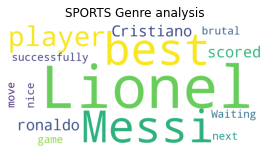

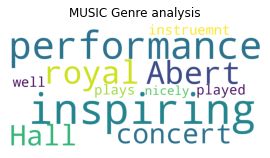

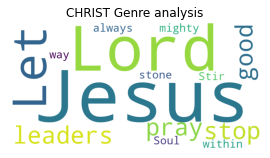

<Figure size 432x288 with 0 Axes>

In [387]:
# Loop the comments and create wordclouds of their content make sure to name the figues accordingly(Category)
for i in categories:
    plt.figure(figsize=(19, 8));
    cloud.generate(total_comments[i]);
    plt.subplot(3, 1, (np.where(categories == i)[0]+1));
    plt.title("{0} Genre analysis".format(i));
    plt.imshow(cloud);
    plt.axis('off');
plt.show();
plt.savefig("wordCloud_videos_by_genres.jpg", dpi=90, format="jpg");